# setup

In [29]:
import numpy as np
import keras
from keras import layers 
import random
import os

SEED = 32
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
# tf.random.set_seed(SEED)
random.seed(SEED)

# Prepare the data

In [31]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [24]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


# Build the model

In [25]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

# Train the model

In [32]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)

Epoch 1/5
446/446 [==============================] - 13s 28ms/step - loss: 0.4931 - accuracy: 0.8467 - val_loss: 0.1048 - val_accuracy: 0.9743
Epoch 2/5
446/446 [==============================] - 12s 27ms/step - loss: 0.1549 - accuracy: 0.9516 - val_loss: 0.0703 - val_accuracy: 0.9833
Epoch 3/5
446/446 [==============================] - 12s 26ms/step - loss: 0.1206 - accuracy: 0.9625 - val_loss: 0.0579 - val_accuracy: 0.9883
Epoch 4/5
446/446 [==============================] - 12s 28ms/step - loss: 0.0991 - accuracy: 0.9695 - val_loss: 0.0476 - val_accuracy: 0.9890
Epoch 5/5
446/446 [==============================] - 13s 28ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.0423 - val_accuracy: 0.9903


# Evaluate the trained model

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]*100)

Test loss: 0.04442447051405907
Test accuracy: 98.6299991607666


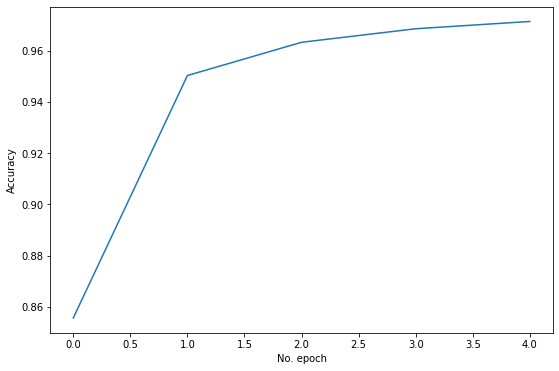

In [11]:
# plot training graph for each epoch
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.show()

# save model

In [12]:
#%% save the model
model.save('model_CNN.h5')

# Test

this is number 5


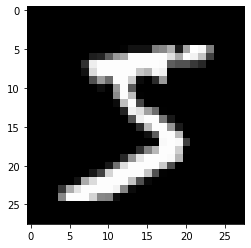

In [36]:
# #%% import library and function
# from keras.datasets import mnist
# import numpy as np 
# from keras.models import load_model
# import cv2 as cv
import matplotlib.pyplot as plt


# #load model
# model = load_model('model_CNN.h5')
# model.summary()
# model.get_weights()

# # read image
# img = cv.imread("1.png",0)
# plt.imshow(img,'gray')

# # normalize to 0-1
# img = img/255.0

# # reshape the input image to vector
# img_input = img.reshape(1,784) 


# prediction
pred = model.predict(x_train[0].reshape((1,)+input_shape))
plt.imshow(x_train[0],cmap="gray")
# pred = model.predict(img_input)
# find the highest probability for answer
result = np.where(pred == np.amax(pred))
answer = list(result[1])
print('this is number',answer[0])

# Get output in each layer

28 28
26 26
13 13
11 11
5 5


<Figure size 600x600 with 0 Axes>

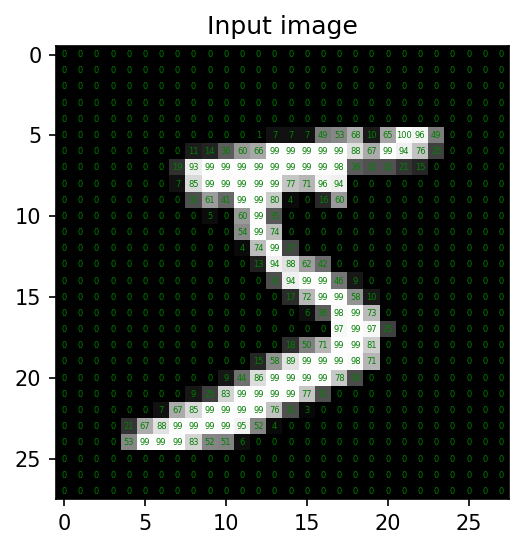

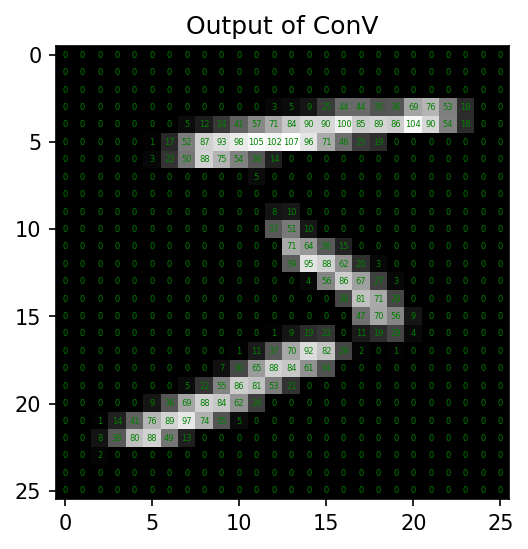

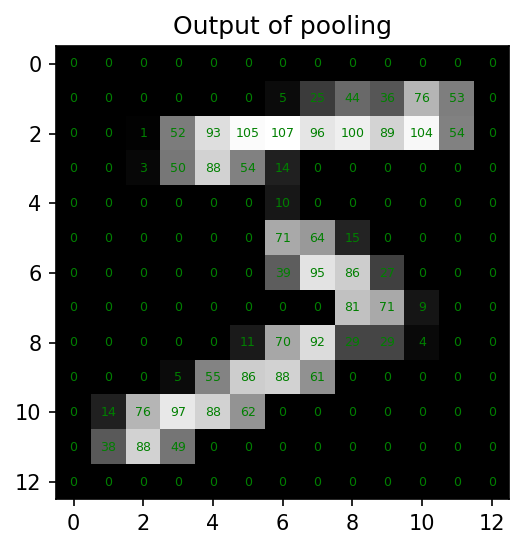

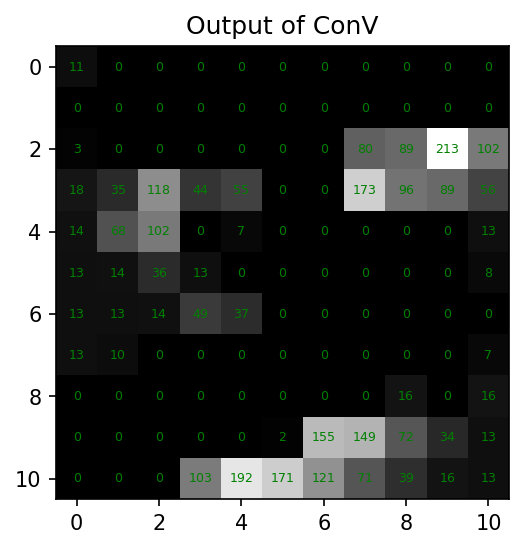

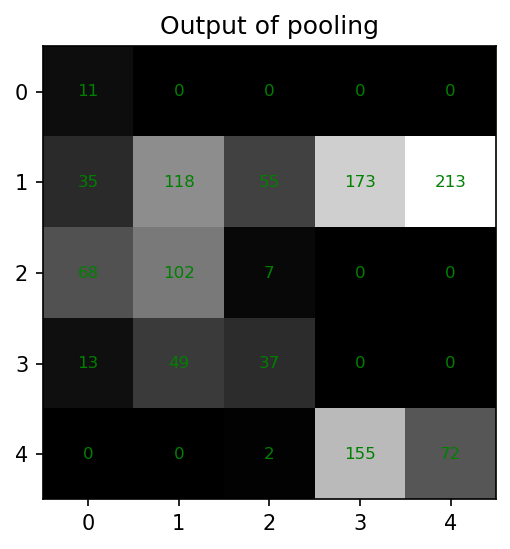

In [37]:
from keras import backend as K
import matplotlib.pyplot as plt

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
# test = np.random.random(input_shape)[np.newaxis,...]
test = x_train[0].reshape((1,)+input_shape)
layer_outs = [func([test]) for func in functors]

def output2map(img, i):
    fig = plt.figure(figsize=(4,4), dpi=150)
    img = img * 100
    img = img.astype(int)
    H, W = img.shape
    print(H, W)
    plt.imshow(img, cmap='gray')
    if i == 0:
        plt.title('Input image')
    else:
        if i%2==1:
            plt.title('Output of ConV')
        else:
            plt.title('Output of pooling')
    if i>=0:
        fz = 4 + (i//2)*2
        for k in range(H):
            for j in range(W):
                text = plt.text(j, k, img[k, j], size=fz, ha="center", va="center", color='g')


fig = plt.figure(figsize=(4,4), dpi=150)
output2map(test.reshape(input_shape[0:2]), 0)
for i in range(1,len(layer_outs)+1):
    shape = layer_outs[i-1][0].shape
    if len(shape)>3:
        img = layer_outs[i-1][0][0,:,:,0]
        output2map(img, i)
        # break

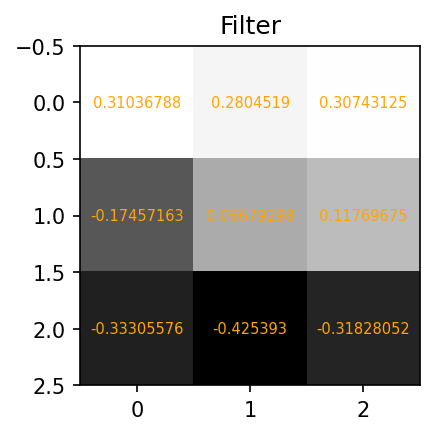

<Figure size 450x450 with 0 Axes>

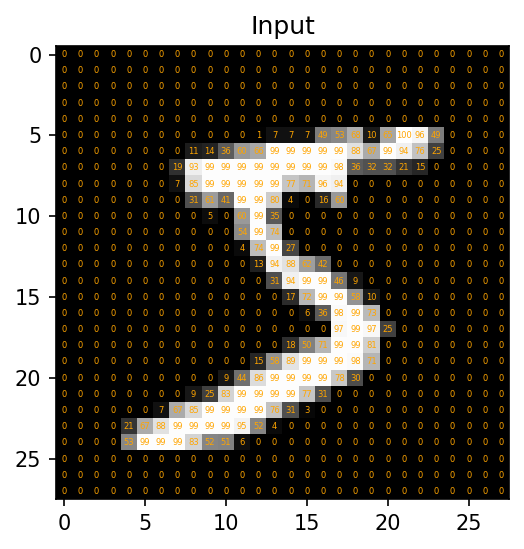

<Figure size 450x450 with 0 Axes>

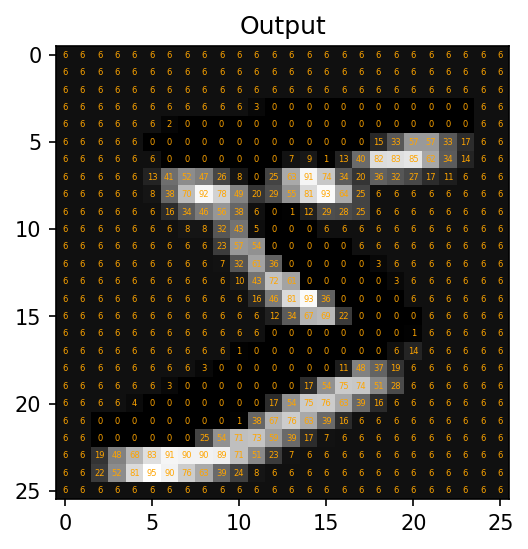

In [15]:
filter = model.get_weights()[0][:,:,0,0]
# filter = np.array([[.1,0,.1],[0,.5,0],[.1,0,.1]])
w, W = 0,28#0,14
h, H = 0,28#14,28
val = x_train[0].reshape(input_shape[0:2])
new_val = np.zeros((28,28))
for i in range(w,W):
    for j in range(h,H):
        if i-1<0 or i+1>W-1 or j-1<0 or j+1>H-1:
            continue
        else:
            new_val[i,j] = np.sum(filter * val[i-1:i+2,j-1:j+2])  # apply filter
            new_val[i,j] += model.get_weights()[1][0] # add bias
            new_val[i,j] = 0 if new_val[i,j]<0 else new_val[i,j] # apply ReLU

def vis(img, name, tran=True):
    fig = plt.figure(figsize=(3,3), dpi=150)
    fz = 7
    if tran:
        fig = plt.figure(figsize=(4,4), dpi=150)
        img = img * 100
        img = img.astype(int)
        fz = 4
    H, W = img.shape
    plt.imshow(img, cmap='gray')
    for k in range(H):
        for j in range(W):
            text = plt.text(j, k, img[k, j], size=fz, ha="center", va="center", color="orange")
    plt.title(name)

vis(filter, 'Filter', False)
vis(val[w:W, h:H], 'Input')
vis(new_val[w+1:W-1, h+1:H-1], 'Output')